In [1]:
! pip install mglearn

     |████████████████████████████████| 542kB 4.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [2]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Tree Ensemble Models
 * Decision Trees
 * Random Forests
 * XGBoosting
 



See https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

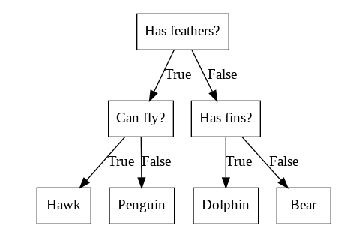

In [3]:
mglearn.plots.plot_animal_tree()

In [0]:
# load data
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [0]:
# print(cancer.DESCR)

In [96]:
# DT with unlimited depth (overfitting)
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Depth = ", tree.get_depth())
print("Number of leaves = ", tree.get_n_leaves())
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Depth =  7
Number of leaves =  18
Accuracy on training set: 1.000
Accuracy on test set: 0.937


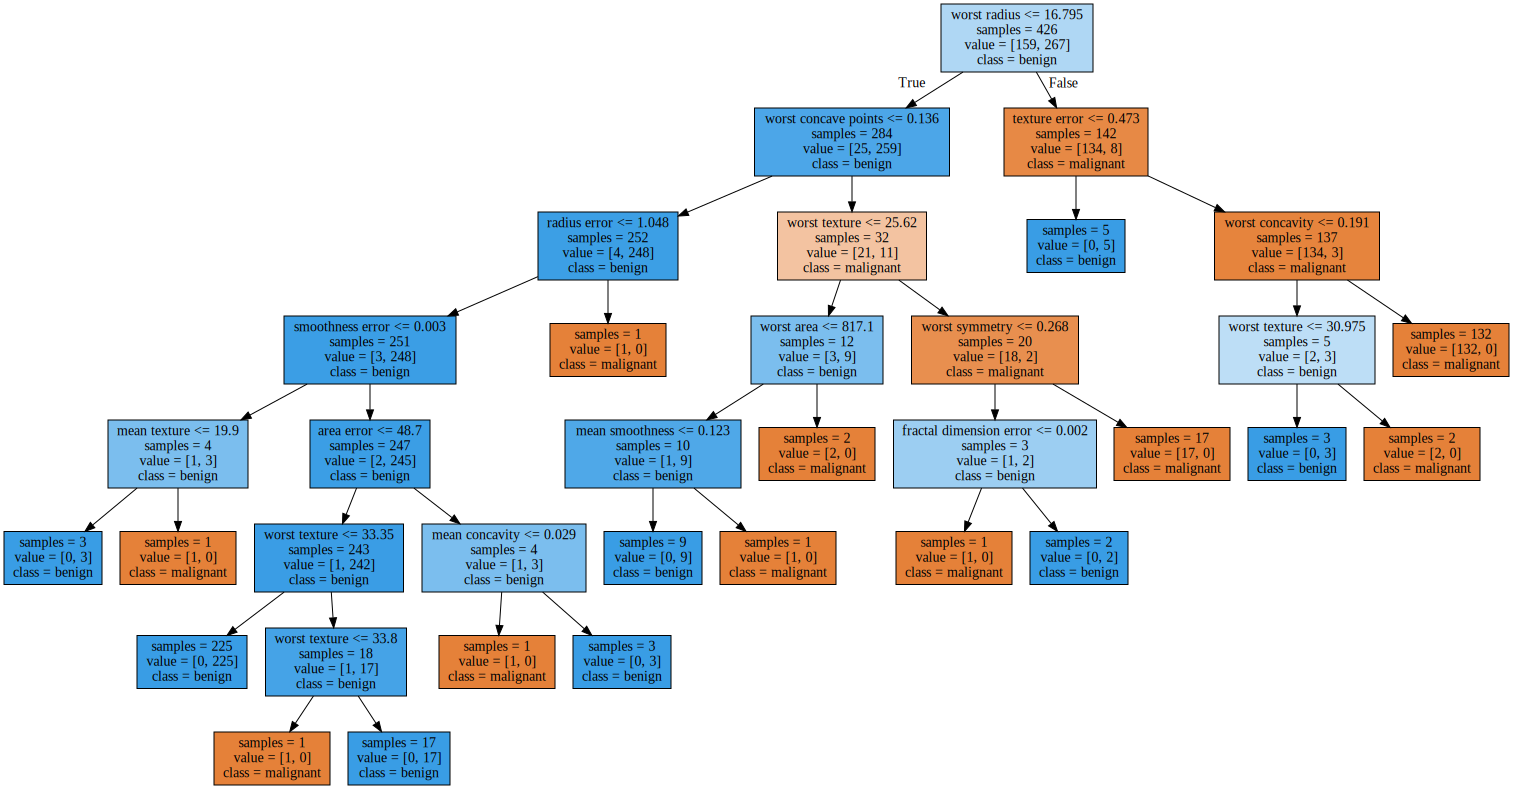

In [97]:
# display tree structure
import graphviz
from sklearn.tree import export_graphviz
import pydot

def display_tree(tree):
  # Analyzing decision tree
  export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

  with open("tree.dot") as f:
    dot_graph = f.read()
  
  display(graphviz.Source(dot_graph))
  
display_tree(tree)

In [101]:
# display importance of features

print("feature names: ", cancer.feature_names)
print("feature importance: ", tree.feature_importances_)

for name, imp in zip(cancer.feature_names, tree.feature_importances_):
  print("{} : {}".format(name, imp))

feature names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
feature importance:  [0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]
mean radius : 0.0
mean texture : 0.007525969896120416
mean perimeter : 0.0
mean area : 0

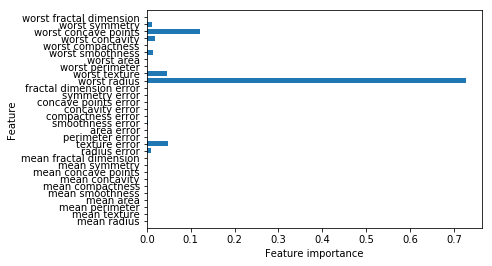

In [95]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  plt.ylim(-1, n_features)
  
plot_feature_importances_cancer(tree)

In [0]:
# save tree structure into a png file

def save_tree_png(tree, filename):
  export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)
  (graph,) = pydot.graph_from_dot_file('tree.dot', encoding='utf8')
  graph.write_png(filename)
  
# save_tree_png(tree, 'tree.png')

# display image from file
#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg

#plt.imshow(mpimg.imread('tree.png'))

## Limiting tree depth to prevent overfitting

In [92]:
# DT with maximum depth = 4

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Depth = ", tree.get_depth())
print("Number of leaves = ", tree.get_n_leaves())
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Depth =  4
Number of leaves =  11
Accuracy on training set: 0.988
Accuracy on test set: 0.951


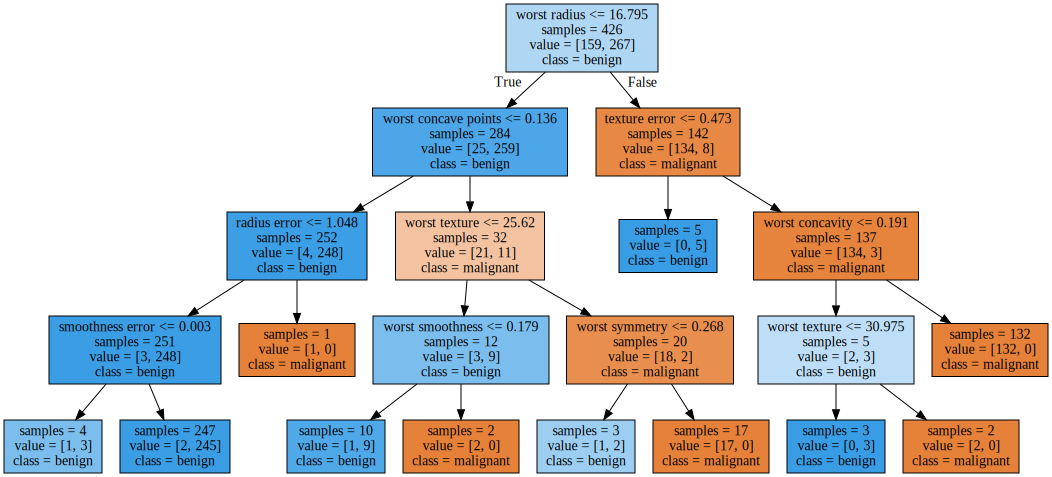

In [68]:
display_tree(tree)

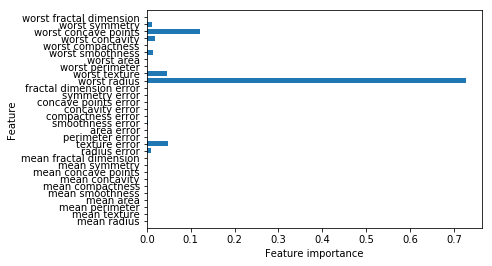

In [94]:

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


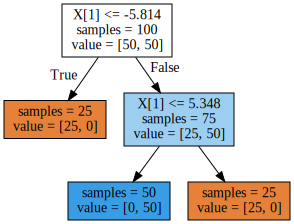

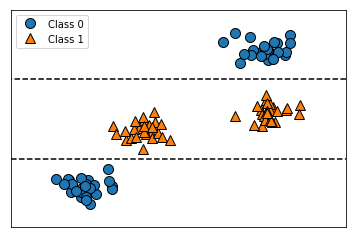

In [102]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

## Random Forests

Tree is tend to overfit the training data

Random forest is a collection of trees that less suffer from overfitting)

* Build multiple decision trees from randomly sampled n samples with repacement (complexity is controlled by **max_features** parameter)

* Aggregate the results of the trees by soft voting


See https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

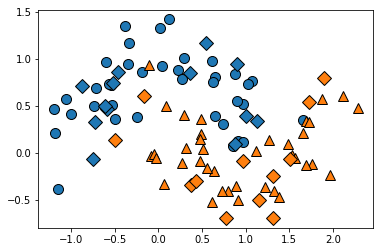

In [106]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='D')

In [113]:
# create and train RandomForestClassifier instance
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

print("type of forest.estimators_ is {} of length {}". format(type(forest.estimators_), len(forest.estimators_)))

type of forest.estimators_ is <class 'list'> of length 5


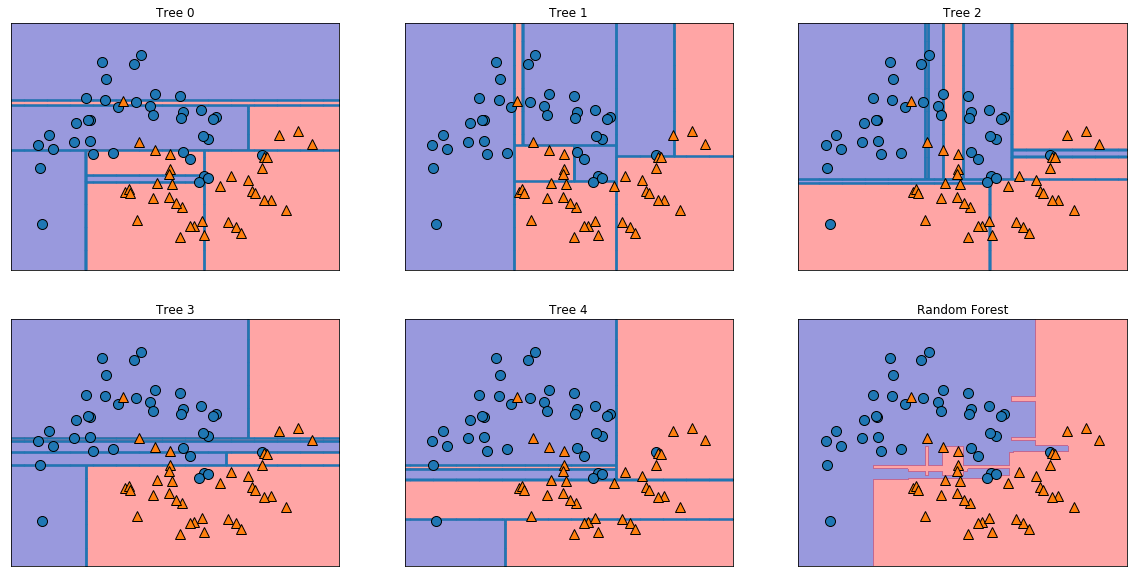

In [105]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
  
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

## XGBoosts

In [0]:
import xgboost as xgb



## input format of xgboost: xgb.DMatrix

* To load a NumPy array into DMatrix:

```
    data = np.random.rand(5, 10)  # 5 entities, each contains 10 features
    label = np.random.randint(2, size=5)  # binary target
    dtrain = xgb.DMatrix(data, label=label)
```


* To load a Pandas data frame into DMatrix:

```
    data = pandas.DataFrame(np.arange(12).reshape((4,3)), columns=['a', 'b', 'c'])
    label = pandas.DataFrame(np.random.randint(2, size=4))
    dtrain = xgb.DMatrix(data, label=label)
```

* To load a libsvm text file or a XGBoost binary file into DMatrix:

```
     dtrain = xgb.DMatrix('train.svm.txt')
     dtest = xgb.DMatrix('test.svm.buffer')
```

* To load a CSV file into DMatrix:
  
   (Note! label_column specifies the index of the column containing the true label)

```
     dtrain = xgb.DMatrix('train.csv?format=csv&label_column=0')
     dtest = xgb.DMatrix('test.csv?format=csv&label_column=0')
```


for detail, see https://xgboost.readthedocs.io/en/latest/python/python_intro.html

In [0]:
# test with moons dataset

from sklearn import datasets


from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
# convert numpy array into DMatrix

dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test, label = y_test)

In [117]:
# reading from file 

"""
from sklearn.datasets import dump_svmlight_file

dump_svmlight_file(X_train, y_train, 'dtrain.svm', zero_based=True)
dump_svmlight_file(X_test, y_test, 'dtest.svm', zero_based=True)

! cat dtrain.svm
! cat dtest.svm

dtrain_svm = xgb.DMatrix('dtrain.svm')
dtest_svm = xgb.DMatrix('dtest.svm')
"""

"\nfrom sklearn.datasets import dump_svmlight_file\n\ndump_svmlight_file(X_train, y_train, 'dtrain.svm', zero_based=True)\ndump_svmlight_file(X_test, y_test, 'dtest.svm', zero_based=True)\n\n! cat dtrain.svm\n! cat dtest.svm\n\ndtrain_svm = xgb.DMatrix('dtrain.svm')\ndtest_svm = xgb.DMatrix('dtest.svm')\n"

For the parameters of xgboost, refer
https://xgboost.readthedocs.io/en/latest/parameter.html

In [0]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

In [0]:
# train xgboost tree
bst = xgb.train(param, dtrain, num_round)
bst.dump_model('dump.raw.txt')

In [124]:
# predict using xgboost
preds = bst.predict(dtest)
print("type of preds: ", type(preds))
print("preds: ", preds)

type of preds:  <class 'numpy.ndarray'>
preds:  [[0.67208254 0.31138423 0.01653324]
 [0.00681053 0.99050397 0.00268553]
 [0.9455021  0.05005227 0.00444565]
 [0.01900388 0.97526985 0.00572629]
 [0.13378143 0.8489694  0.01724922]
 [0.97478265 0.01872978 0.00648757]
 [0.86567813 0.1289186  0.00540331]
 [0.00770197 0.9892643  0.00303376]
 [0.01900388 0.97526985 0.00572629]
 [0.1094141  0.87534326 0.01524266]
 [0.28072459 0.7083842  0.01089123]
 [0.97478265 0.01872978 0.00648757]
 [0.4541871  0.53017443 0.0156385 ]
 [0.97800696 0.01592738 0.00606571]
 [0.9729437  0.02331069 0.00374562]
 [0.19633725 0.7796107  0.02405206]
 [0.6546468  0.33325058 0.0121026 ]
 [0.00770197 0.9892643  0.00303376]
 [0.04024765 0.9516743  0.00807806]
 [0.930545   0.0644668  0.00498825]]


In [126]:
best_preds = np.asarray([np.argmax(line) for line in preds]) # np.asarray() converts input as an array
best_preds

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0])

In [129]:
from sklearn.metrics import precision_score
print("precision score = {}".format(precision_score(y_test, best_preds, average='macro')))

precision score = 0.9545454545454546


In [128]:
# save model

from sklearn.externals import joblib

joblib.dump(bst, 'bst_model.pkl', compress=True)

['bst_model.pkl']